In [177]:
import numpy as np # linear algebra
import pandas as pd # data processing
#Vizualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.subplots as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly_express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# <a id="1">1.Data</a>

In [3]:
df=pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <a id="2">1.1. Data overview</a>

In [37]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
df.info()

Rows     :  284807
Columns  :  31

Features : 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values :   0

Unique values :  
 Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        

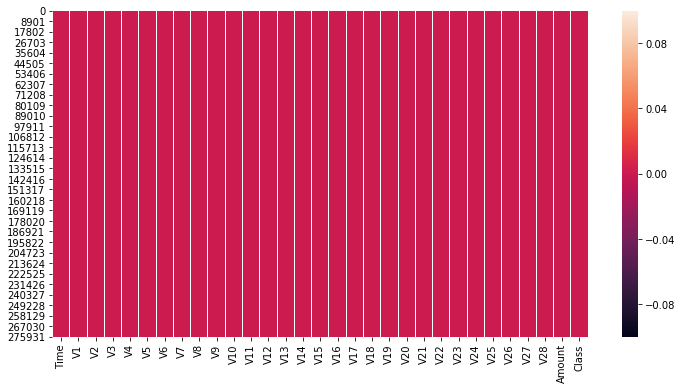

In [165]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

# <a id="2"> 2. Exploratory Data Analysis </a>

In [38]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [91]:
df1000=df[["Time","Amount","Class","V1","V10","V20","V28"]][:1000:]

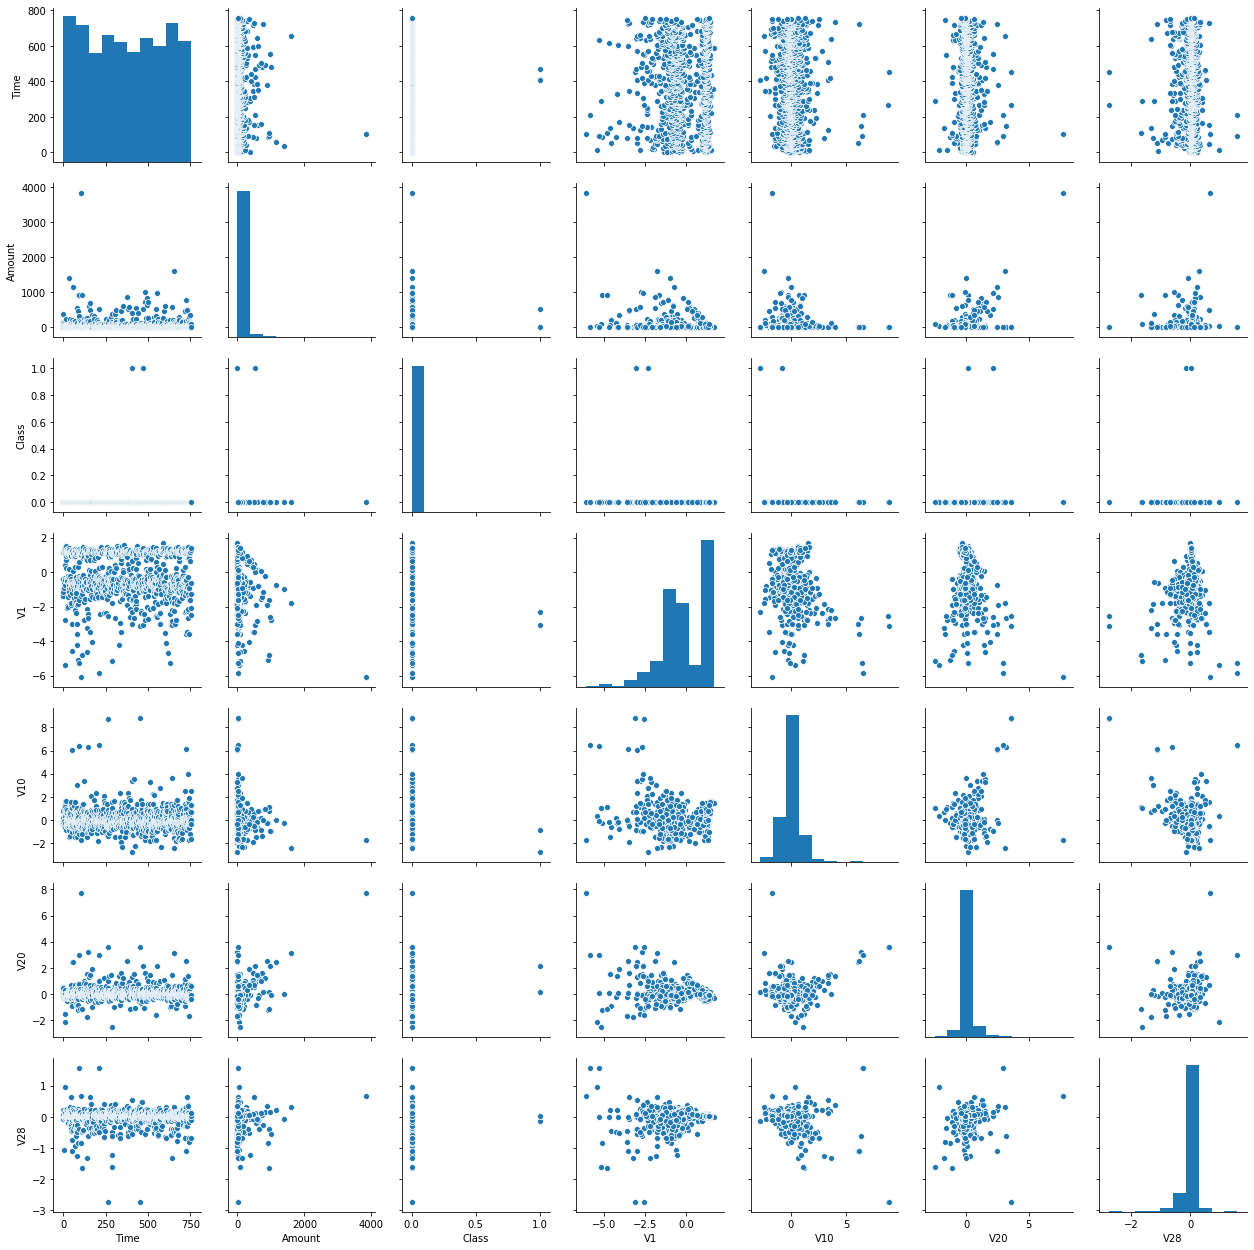

In [52]:
sns.pairplot(df1000)

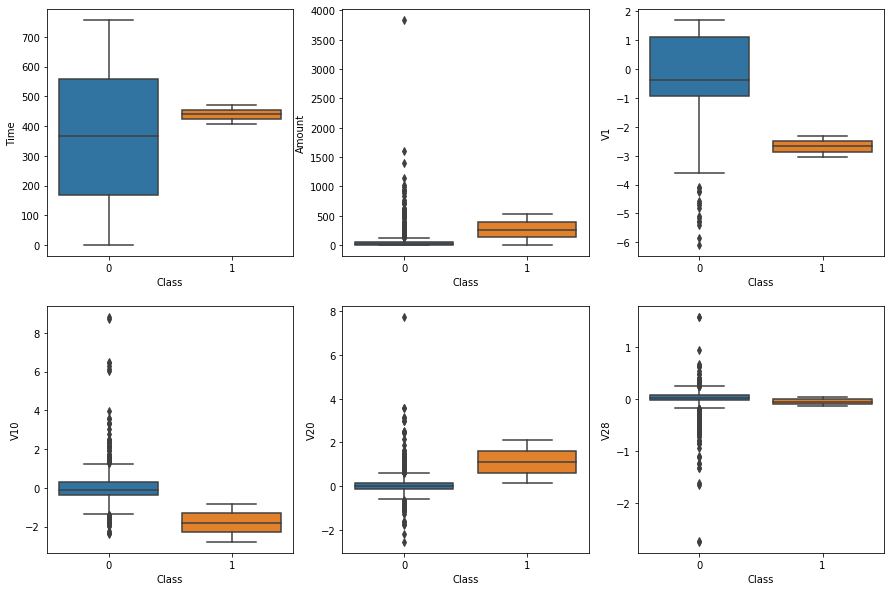

In [142]:
fig, axes = plt.subplots(2, 3,figsize=(15,10))
sns.boxplot(x="Class",y="Time",data=df1000,ax=axes[0][0])
sns.boxplot(x="Class",y="Amount",data=df1000,ax=axes[0][1])
sns.boxplot(x="Class",y="V1",data=df1000,ax=axes[0][2])
sns.boxplot(x="Class",y="V10",data=df1000,ax=axes[1][0])
sns.boxplot(x="Class",y="V20",data=df1000,ax=axes[1][1])
sns.boxplot(x="Class",y="V28",data=df1000,ax=axes[1][2])

In [161]:
df2=df1000[["V1","V10","V20","V28","Class"]]
df2=pd.melt(df2,id_vars="Class",var_name="Features",value_name="value")

(-0.03, 0.05)

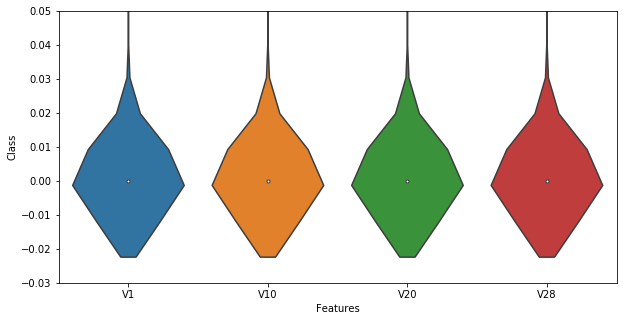

In [162]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Features",y="Class",data=df2)
plt.ylim(-0.03,0.05)

In [146]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 850,
                        width   = 850,
                        margin  = dict(r = 0 ,l = 110,
                                       t = 25,b = 10,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 12)),
                        xaxis   = dict(tickfont = dict(size = 12))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

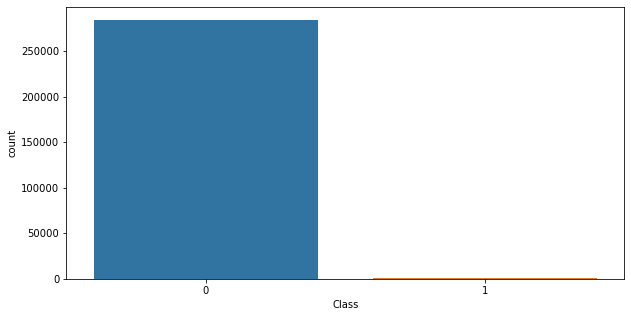

In [3]:
plt.figure(figsize=(10,5))
sns.countplot(df["Class"])

In [5]:
Fraud=df[df['Class']==1]
NoFraud=df[df['Class']==0]
Fraud.shape,NoFraud.shape

((492, 31), (284315, 31))

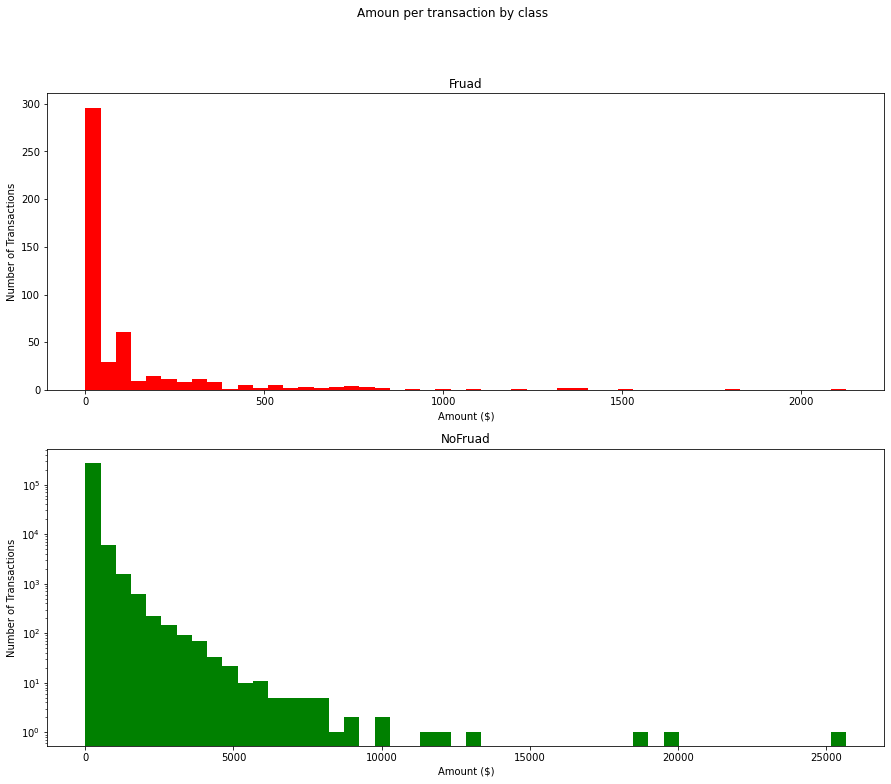

In [14]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(15,12))
fig.suptitle("Amoun per transaction by class")
ax1.hist(Fraud.Amount,bins=50,color="red")
ax1.set_title("Fruad")
ax1.set_xlabel("Amount ($)")
ax1.set_ylabel("Number of Transactions")
ax2.hist(NoFraud.Amount,color="green",bins=50)
ax2.set_title("NoFruad")
ax2.set_xlabel("Amount ($)")
ax2.set_ylabel("Number of Transactions")
# plt.xlim((0,20000))
plt.yscale("log")


Text(0, 0.5, 'Amount')

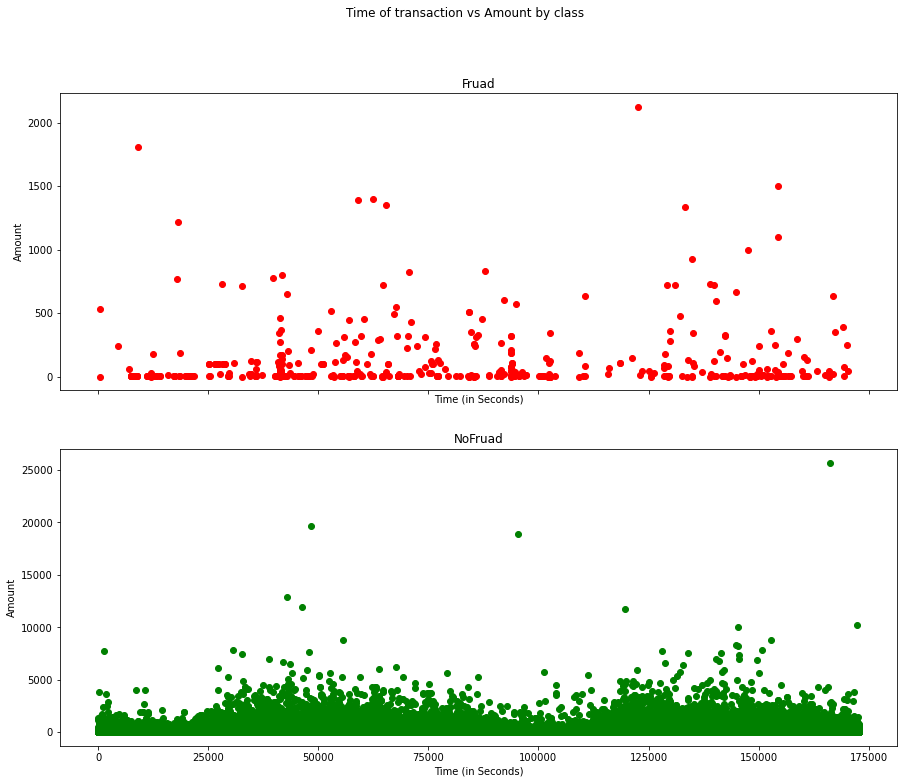

In [16]:
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True,figsize=(15,12))
fig.suptitle("Time of transaction vs Amount by class")
ax1.scatter(Fraud.Time,Fraud.Amount,color="red")
ax1.set_title("Fruad")
ax1.set_xlabel("Time (in Seconds)")
ax1.set_ylabel("Amount")
ax2.scatter(NoFraud.Time,NoFraud.Amount,color="green")
ax2.set_title("NoFruad")
ax2.set_xlabel("Time (in Seconds)")
ax2.set_ylabel("Amount")
# plt.xlim((0,20000))


# <a id="3"> 3. Data Preprocessing </a>

In [185]:
X=df.iloc[:,:-1]
y=df.iloc[:,30:31].ravel()
y.shape

AttributeError: 'DataFrame' object has no attribute 'ravel'

In [5]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# <a id="4"> 4. Model Building </a>

In [197]:
def Fraud(algorithm,X_train,X_test,y_train,y_test):
    algorithm.fit(X_train,y_train)
    training_score=algorithm.score(X_train,y_train)
    pred=algorithm.predict(X_test)
    probablities=algorithm.predict_proba(X_test)
    print("Training score: ",training_score)
    print("Classification report: \n",classification_report(y_test,pred))
    print("Accuracy Score :",accuracy_score(y_test,pred))
    print('F1_score :', f1_score(y_test,pred))
#     plot confusion matrix
    cm=confusion_matrix(y_test,pred)
     #plot roc_auc_score
    model_roc_auc = roc_auc_score(y_test,pred) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_test,probablities[:,1])
    
    #     plot confusion matrix
    trace1 = go.Heatmap(z = cm ,
                        x = ["Not Fraud","Fraud"],
                        y = ["Not Fraud","Fraud"],
                        showscale  = False,colorscale = [(0, "red"), (0.5, "green"), (1, "blue")],
                        name = "matrix")
    #plot roc_auc_score
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    fig = tls.make_subplots(rows=1, cols=2,
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = True,height = 500,width = 1000,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 10))
    fig["layout"]["xaxis2"].update(dict(title = "False positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "True positive rate"))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)

    py.iplot(fig)
        
    coefs =algorithm.coef_.reshape(30,1)
    coefs1=pd.DataFrame(coefs).rename(columns={0:"Coef"})
    col=X_train.columns[algorithm.coef_.argsort().reshape(30,1)]
    columns=pd.DataFrame(col).rename(columns={0:"Columns"})
    imp=pd.concat([columns,coefs1],axis=1)
    imp=imp.sort_values(by=["Coef"],ascending=False)
    fig=px.bar(imp, x='Columns', y='Coef')
    fig.show()
    
    
logit=LogisticRegression()
Fraud(logit,X_train,X_test,y_train,y_test)

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\sabuh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training score:  0.9989416343973837
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.69      0.60      0.65       136

    accuracy                           1.00     85443
   macro avg       0.85      0.80      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score : 0.9989466661985184
F1_score : 0.6456692913385826
Area under curve :  0.8012595856212061 



In [178]:
# col_sorted_by_importance=forest.feature_importances_.argsort()[::-1]
# feat_imp=pd.DataFrame({
#     'cols':X_train.columns[col_sorted_by_importance],
#     'imps':forest.feature_importances_[col_sorted_by_importance]

# })
# import plotly_express as px
# px.bar(feat_imp, x='cols', y='imps')

#     coefs = np.abs(algorithm.coef_[0])
#     indices = np.argsort(coefs)[::-1]
#     plt.figure(figsize=(12,7))
#     plt.title("Feature importances (Logistic Regression)")
#     plt.bar(range(30), coefs[indices[:30]],color="r", align="center")
#     plt.xticks(range(30), X_train.columns, rotation=45, ha='right')
#     plt.subplots_adjust(bottom=0.3)